In [102]:
import pandas as pd
#import mataplotlib.pylot as plt
df=pd.DataFrame()#Blank dataframe


In [103]:

import pandas as pd

# Load the dataset, parsing the 'Date' column as a datetime object and setting it as the index
df = pd.read_csv('CPIAUCSL.csv', index_col='DATE', parse_dates=True)

# Resample the index to a monthly start frequency ('MS') if necessary
df = df.resample('MS').mean()  # 'MS' refers to the start of the month

# Show the first few rows of the dataframe
print(df.head())
#Last details
print('The last 3',df.tail(3))






            VALUE
DATE             
1947-01-01  21.48
1947-02-01  21.62
1947-03-01  22.00
1947-04-01  22.00
1947-05-01  21.95
The last 3               VALUE
DATE               
2016-04-01  238.890
2016-05-01  239.410
2016-06-01  239.927


<Axes: title={'center': 'CPIAUCSL Over Time'}, xlabel='DATE'>

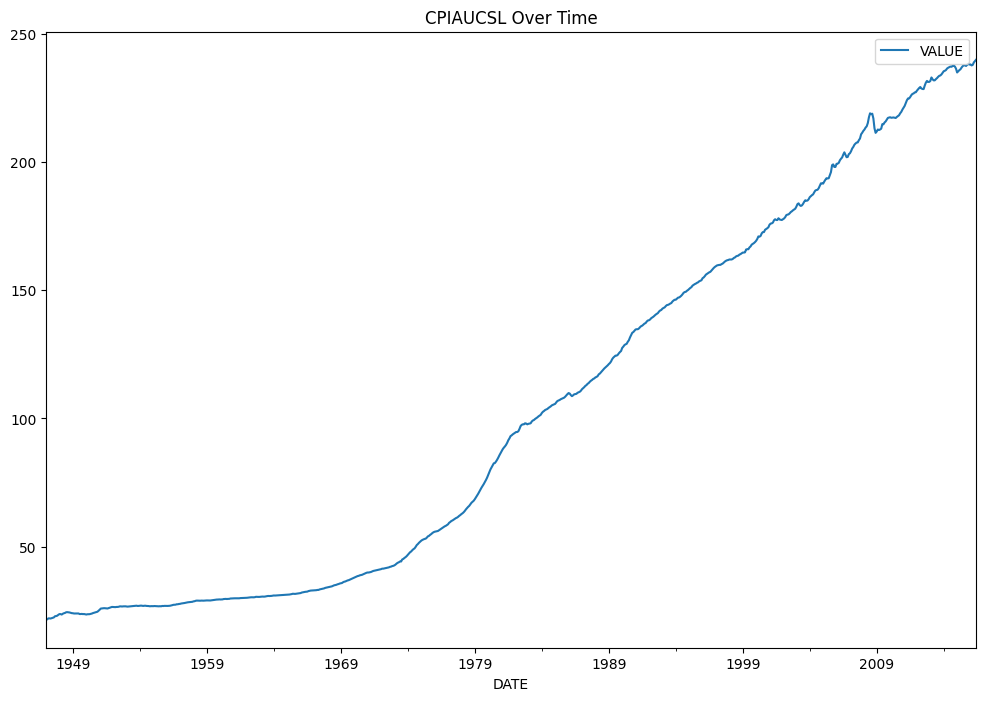

In [104]:
# Plot the data if needed
df.columns=['VALUE']
df.plot(figsize=(12, 8), title='CPIAUCSL Over Time')

In [105]:
df['Value_lastMonth']= df['VALUE'].shift(+1)
df['Value_2MonthsBack']= df['VALUE'].shift(+2)
df['Value_3MonthsBack']= df['VALUE'].shift(+3)
df

,VALUE,Value_lastMonth,Value_2MonthsBack,Value_3MonthsBack
DATE,,,,
1947-01-01,21.480,NaN,NaN,NaN
1947-02-01,21.620,21.480,NaN,NaN
1947-03-01,22.000,21.620,21.480,NaN
1947-04-01,22.000,22.000,21.620,21.480
1947-05-01,21.950,22.000,22.000,21.620
...,...,...,...,...
2016-02-01,237.707,238.107,238.041,238.302
2016-03-01,237.920,237.707,238.107,238.041
2016-04-01,238.890,237.920,237.707,238.107


In [106]:
df=df.dropna()
df

,VALUE,Value_lastMonth,Value_2MonthsBack,Value_3MonthsBack
DATE,,,,
1947-04-01,22.000,22.000,21.620,21.480
1947-05-01,21.950,22.000,22.000,21.620
1947-06-01,22.080,21.950,22.000,22.000
1947-07-01,22.230,22.080,21.950,22.000
1947-08-01,22.400,22.230,22.080,21.950
...,...,...,...,...
2016-02-01,237.707,238.107,238.041,238.302
2016-03-01,237.920,237.707,238.107,238.041
2016-04-01,238.890,237.920,237.707,238.107


In [107]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [108]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [109]:
import numpy as np
#Data pre processing
#Extracting sales from few months back saving them as x1,x2,x3
x1,x2,x3,y=df['Value_lastMonth'], df['Value_2MonthsBack'],df['Value_3MonthsBack'],df['VALUE']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 22.     21.62   21.48 ]
 [ 22.     22.     21.62 ]
 [ 21.95   22.     22.   ]
 ...
 [237.92  237.707 238.107]
 [238.89  237.92  237.707]
 [239.41  238.89  237.92 ]]


In [110]:
from sklearn.model_selection import train_test_split

# Assuming final_x contains your features and y contains your target variable
x_train, x_test, y_train, y_test = train_test_split(final_x, y, test_size=0.2, random_state=42)

# 'test_size=0.2' means 20% of the data will be used for testing, and 80% for training
# 'random_state=42' ensures the split is reproducible


In [111]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lin_model = LinearRegression()

# Fit the model to the training data
lin_model.fit(x_train, y_train)

# Now you can use the fitted model to make predictions
y_pred = lin_model.predict(x_test)

# Evaluate the model (optional, but usually done)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
model.fit(x_train,y_train)
lin_model.fit(x_train,y_train)

Mean Squared Error: 0.08945564866526774


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


LinearRegression()

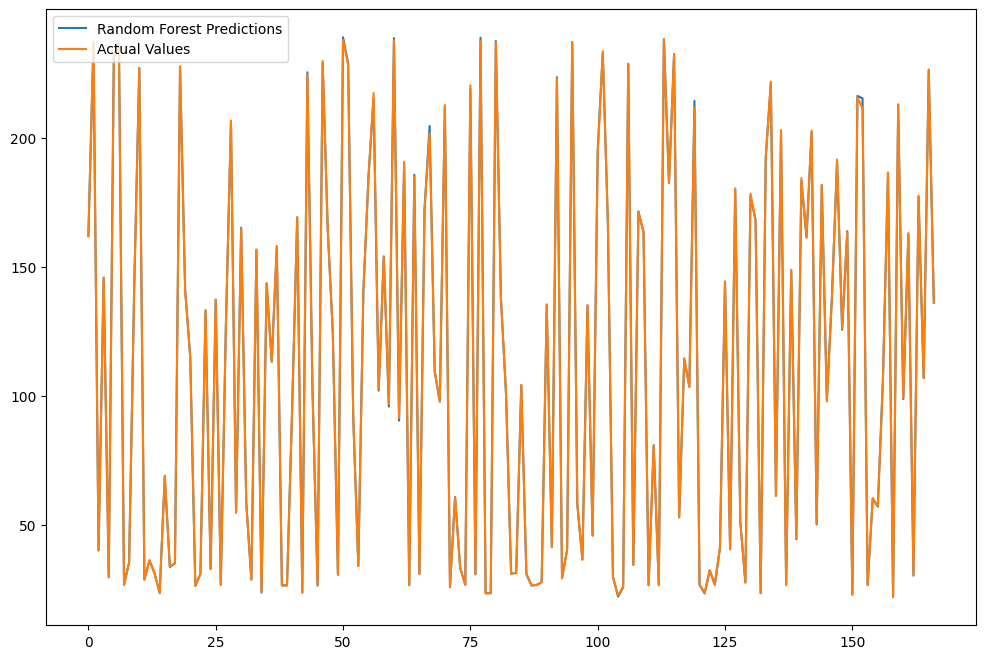

In [112]:
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.rcParams["figure.figsize"] = (12, 8)

# Plot the predicted values (Random Forest predictions)
plt.plot(pred, label='Random Forest Predictions')

# Plot the actual test values
plt.plot(y_test, label='Actual Values')

# Add a legend to the plot
plt.legend(loc="upper left")

# Show the plot
plt.show()


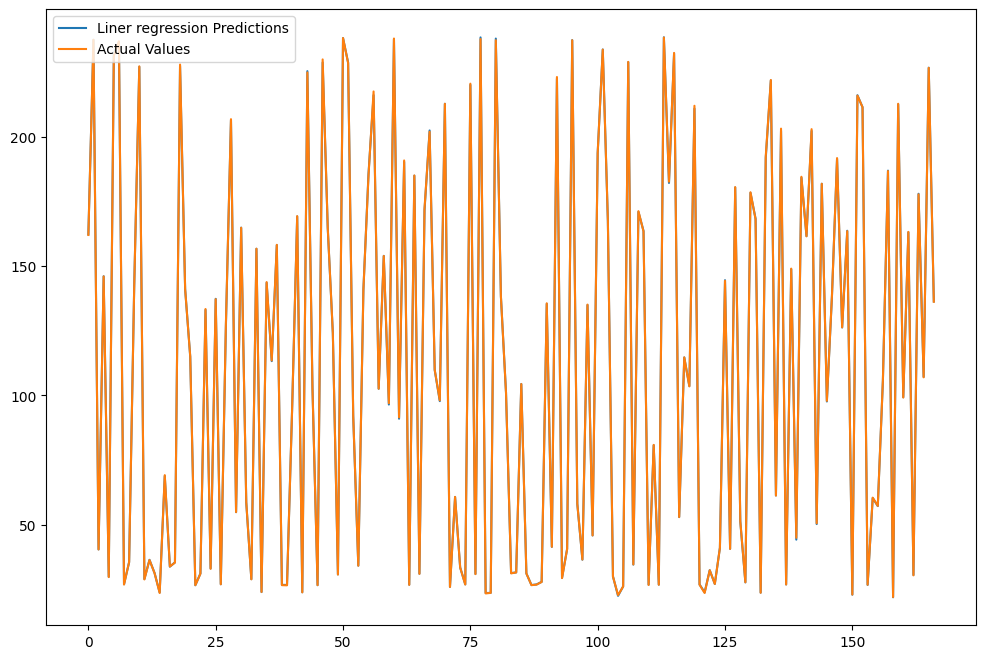

In [113]:
lin_pred=lin_model.predict(x_test)
plt.rcParams["figure.figsize"] = (12, 8)

# Plot the predicted values (Random Forest predictions)
plt.plot(lin_pred,label='Liner regression Predictions')

# Plot the actual test values
plt.plot(y_test, label='Actual Values')

# Add a legend to the plot
plt.legend(loc="upper left")

# Show the plot
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse}")

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae}")

# Calculate the R-squared value (R²)
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")


Mean Squared Error: 0.3506257103168326
Mean Absolute Error: 0.31572207584830975
R-squared: 0.9999393246782555


In [115]:
print(f"Predictions shape: {pred.shape}")
print(f"y_test shape: {y_test.shape}")


Predictions shape: (167,)
y_test shape: (167, 1)


ValueError: x and y must be the same size

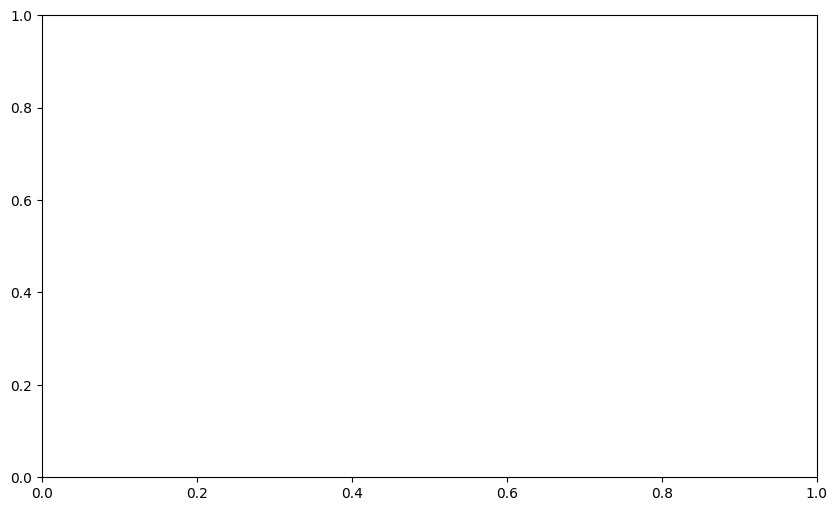

In [119]:
residuals = y_test - pred

plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
residuals = y_test - pred

plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [122]:
% Given matrix A
A = [2 4 6, 3 6 9, 1 5 8];

% 1. Transpose of matrix A
transpose_A = A;

% 2. Sum of all elements in A
sum_A = sum(A(:));

% 3. Determinant of matrix A
det_A = det(A);

% 4. Multiply matrix A by a scalar value of 3
A_scaled = 3 * A;

% 5. Element-wise multiplication of A and B
B = [1 1 1; 0 2 2; 3 0 1];
elementwise_mult = A .* B;

% Display results
disp('Transpose of A:');
disp(transpose_A);

disp('Sum of all elements in A:');
disp(sum_A);

disp('Determinant of A:');
disp(det_A);

disp('A multiplied by 3:');
disp(A_scaled);

disp('Element-wise multiplication of A and B:');
disp(elementwise_mult);


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3608291794.py, line 2)

In [123]:
import numpy as np

# Given matrix A
A = np.array([[2, 4, 6], 
              [3, 6, 9], 
              [1, 5, 8]])

# 1. Transpose of matrix A
transpose_A = A.T
print("Transpose of A:")
print(transpose_A)

# 2. Sum of all elements in A
sum_A = np.sum(A)
print("Sum of all elements in A:", sum_A)

# 3. Determinant of matrix A
det_A = np.linalg.det(A)
print("Determinant of A:", det_A)

# 4. Multiply matrix A by a scalar value of 3
A_scaled = 3 * A
print("A multiplied by 3:")
print(A_scaled)

# 5. Element-wise multiplication of A and B
B = np.array([[1, 1, 1], 
              [0, 2, 2], 
              [3, 0, 1]])

elementwise_mult = A * B
print("Element-wise multiplication of A and B:")
print(elementwise_mult)


Transpose of A:
[[2 3 1]
 [4 6 5]
 [6 9 8]]
Sum of all elements in A: 44
Determinant of A: 0.0
A multiplied by 3:
[[ 6 12 18]
 [ 9 18 27]
 [ 3 15 24]]
Element-wise multiplication of A and B:
[[ 2  4  6]
 [ 0 12 18]
 [ 3  0  8]]
